# Dependencies / Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrame creation

In [2]:
df = pd.read_csv("C:/Users/rerr_/OneDrive/Desktop/portafolio/data_science_eda/data/dirty_cafe_sales.csv")

# Exploring data

In [3]:
# DataFrame shape (rows, columns)
df.shape

(10000, 8)

In [4]:
# Display the first few rows of the DataFrame
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [5]:
# DataFrame summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [6]:
# Column names
df.columns

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')

In [7]:
# Data types of each column
df.dtypes

Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object

In [8]:
# DataFrame statistics
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [9]:
# Check for null values
df.isna().sum()


Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

# Data cleaning

## categorical columns missing values

In [10]:
categorical_missing_values_columns = ["Item", "Payment Method", "Location", "Transaction Date"]

for column in categorical_missing_values_columns:
    print(f"Column {column} has {df[column].unique()} unique values.\n")
    df[column] = df[column].astype(str).str.strip().str.title()
    df[column] = df[column].replace(["Nan", "Error"], "Unknown")
    print(f"Updated column {column} has {df[column].unique()} unique values.")
    print("-" * 150)


Column Item has ['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'UNKNOWN' 'Sandwich' nan
 'ERROR' 'Juice' 'Tea'] unique values.

Updated column Item has ['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'Unknown' 'Sandwich' 'Juice'
 'Tea'] unique values.
------------------------------------------------------------------------------------------------------------------------------------------------------
Column Payment Method has ['Credit Card' 'Cash' 'UNKNOWN' 'Digital Wallet' 'ERROR' nan] unique values.

Updated column Payment Method has ['Credit Card' 'Cash' 'Unknown' 'Digital Wallet'] unique values.
------------------------------------------------------------------------------------------------------------------------------------------------------
Column Location has ['Takeaway' 'In-store' 'UNKNOWN' nan 'ERROR'] unique values.

Updated column Location has ['Takeaway' 'In-Store' 'Unknown'] unique values.
-----------------------------------------------------------------------------------------

## numerical columns missing values

In [11]:
# Numerical columns with missing values
numerical_missing_values_columns = ["Quantity", "Price Per Unit", "Total Spent"]

# Calculate means of those columns (transform non-numeric values to NaN)
numerical_columns_means = {}
for column in numerical_missing_values_columns:
    df[column] = pd.to_numeric(df[column], errors="coerce")
    numerical_columns_means[column] = df[column].mean()

# Fill missing values (NaNs) with column mean
for column in numerical_columns_means:
    print(f"Column {column} has {df[column].unique()} unique values.\n")
    df[column] = df[column].fillna(numerical_columns_means[column])
    print(f"Updated column {column} has {df[column].unique()} unique values.")
    print("-" * 150)

Column Quantity has [ 2.  4.  5.  3.  1. nan] unique values.

Updated column Quantity has [2.        4.        5.        3.        1.        3.0284634] unique values.
------------------------------------------------------------------------------------------------------------------------------------------------------
Column Price Per Unit has [2.  3.  1.  5.  4.  1.5 nan] unique values.

Updated column Price Per Unit has [2.         3.         1.         5.         4.         1.5
 2.94998416] unique values.
------------------------------------------------------------------------------------------------------------------------------------------------------
Column Total Spent has [ 4.  12.   nan 10.  20.   9.  16.  15.  25.   8.   5.   3.   6.   2.
  1.   7.5  4.5  1.5] unique values.

Updated column Total Spent has [ 4.        12.         8.9243525 10.        20.         9.
 16.        15.        25.         8.         5.         3.
  6.         2.         1.         7.5        4.5      

In [14]:
# Transform "Quantity" to int, rounding-up "Price Per Unit" and "Total Spent" to 2 decimals
df["Quantity"] = df["Quantity"].round().astype(int)

df["Price Per Unit"] = df["Price Per Unit"].round(2)
df["Total Spent"] = df["Total Spent"].round(2)

# Checking
for column in numerical_columns_means:
    print(f"Column {column} has {df[column].unique()} unique values.\n")
    print("-" * 150)

Column Quantity has [2 4 5 3 1] unique values.

------------------------------------------------------------------------------------------------------------------------------------------------------
Column Price Per Unit has [2.   3.   1.   5.   4.   1.5  2.95] unique values.

------------------------------------------------------------------------------------------------------------------------------------------------------
Column Total Spent has [ 4.   12.    8.92 10.   20.    9.   16.   15.   25.    8.    5.    3.
  6.    2.    1.    7.5   4.5   1.5 ] unique values.

------------------------------------------------------------------------------------------------------------------------------------------------------


In [15]:
df.isna().sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

# Data Viz

# Products sold per quantity

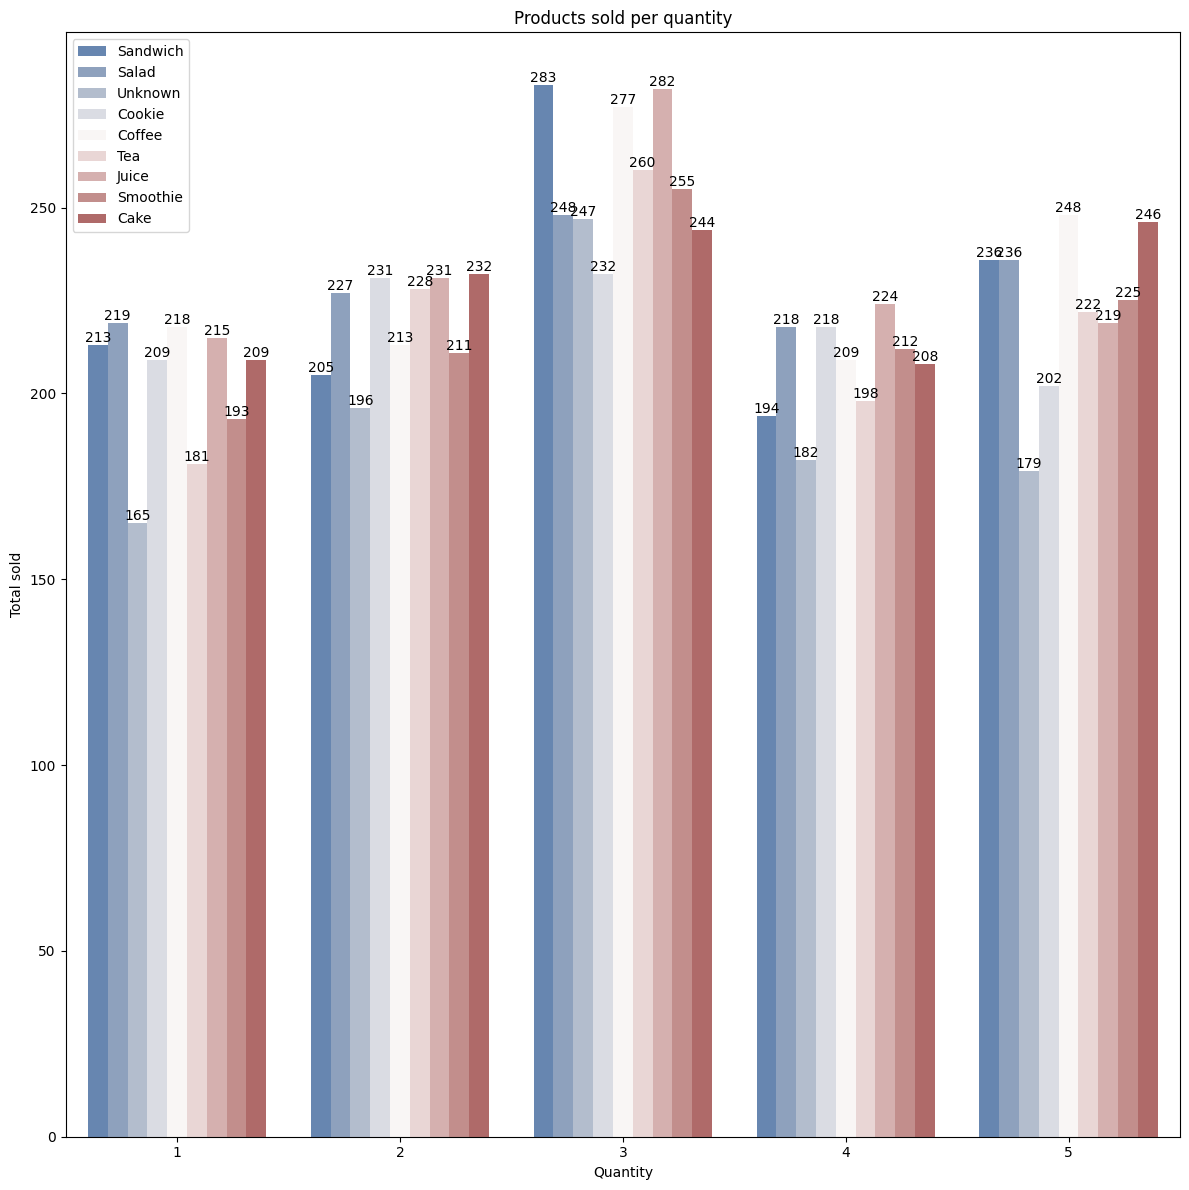

In [52]:
plt.figure(figsize=(12, 12))

ax = sns.countplot(data=df,
            x="Quantity",
            hue="Item",
            palette="vlag",
            stat="count")

for container in ax.containers:
    ax.bar_label(container, label_type="edge", fontsize=10)

plt.title("Products sold per quantity")
plt.legend(loc="upper left")
plt.ylabel("Total sold")
plt.tight_layout()

## products sold per quantity per location

Text(0, 0.5, 'Total sold')

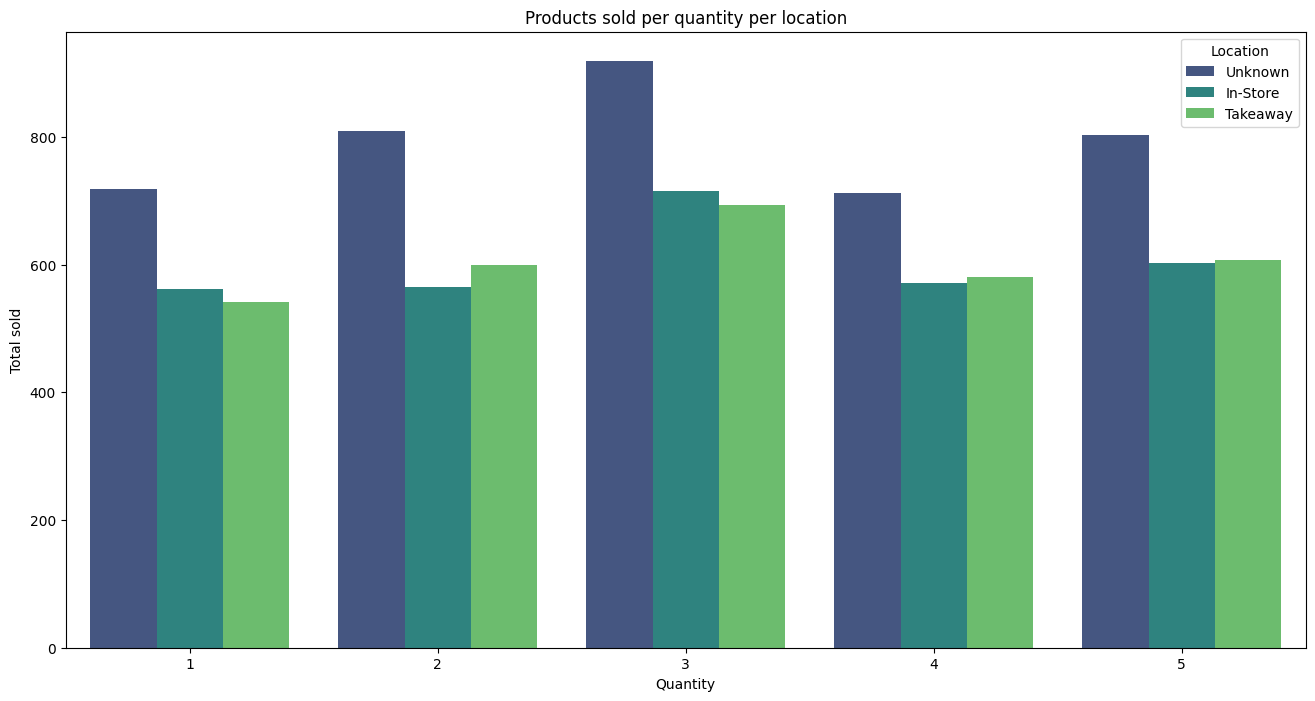

In [31]:
plt.figure(figsize=(16, 8))
sns.countplot(data=df,
            x="Quantity",
            hue="Location",
            palette="viridis",
            stat="count")
plt.title("Products sold per quantity per location")
plt.ylabel("Total sold")

## products sold through time

In [60]:
df.columns

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')

<Figure size 2200x800 with 0 Axes>

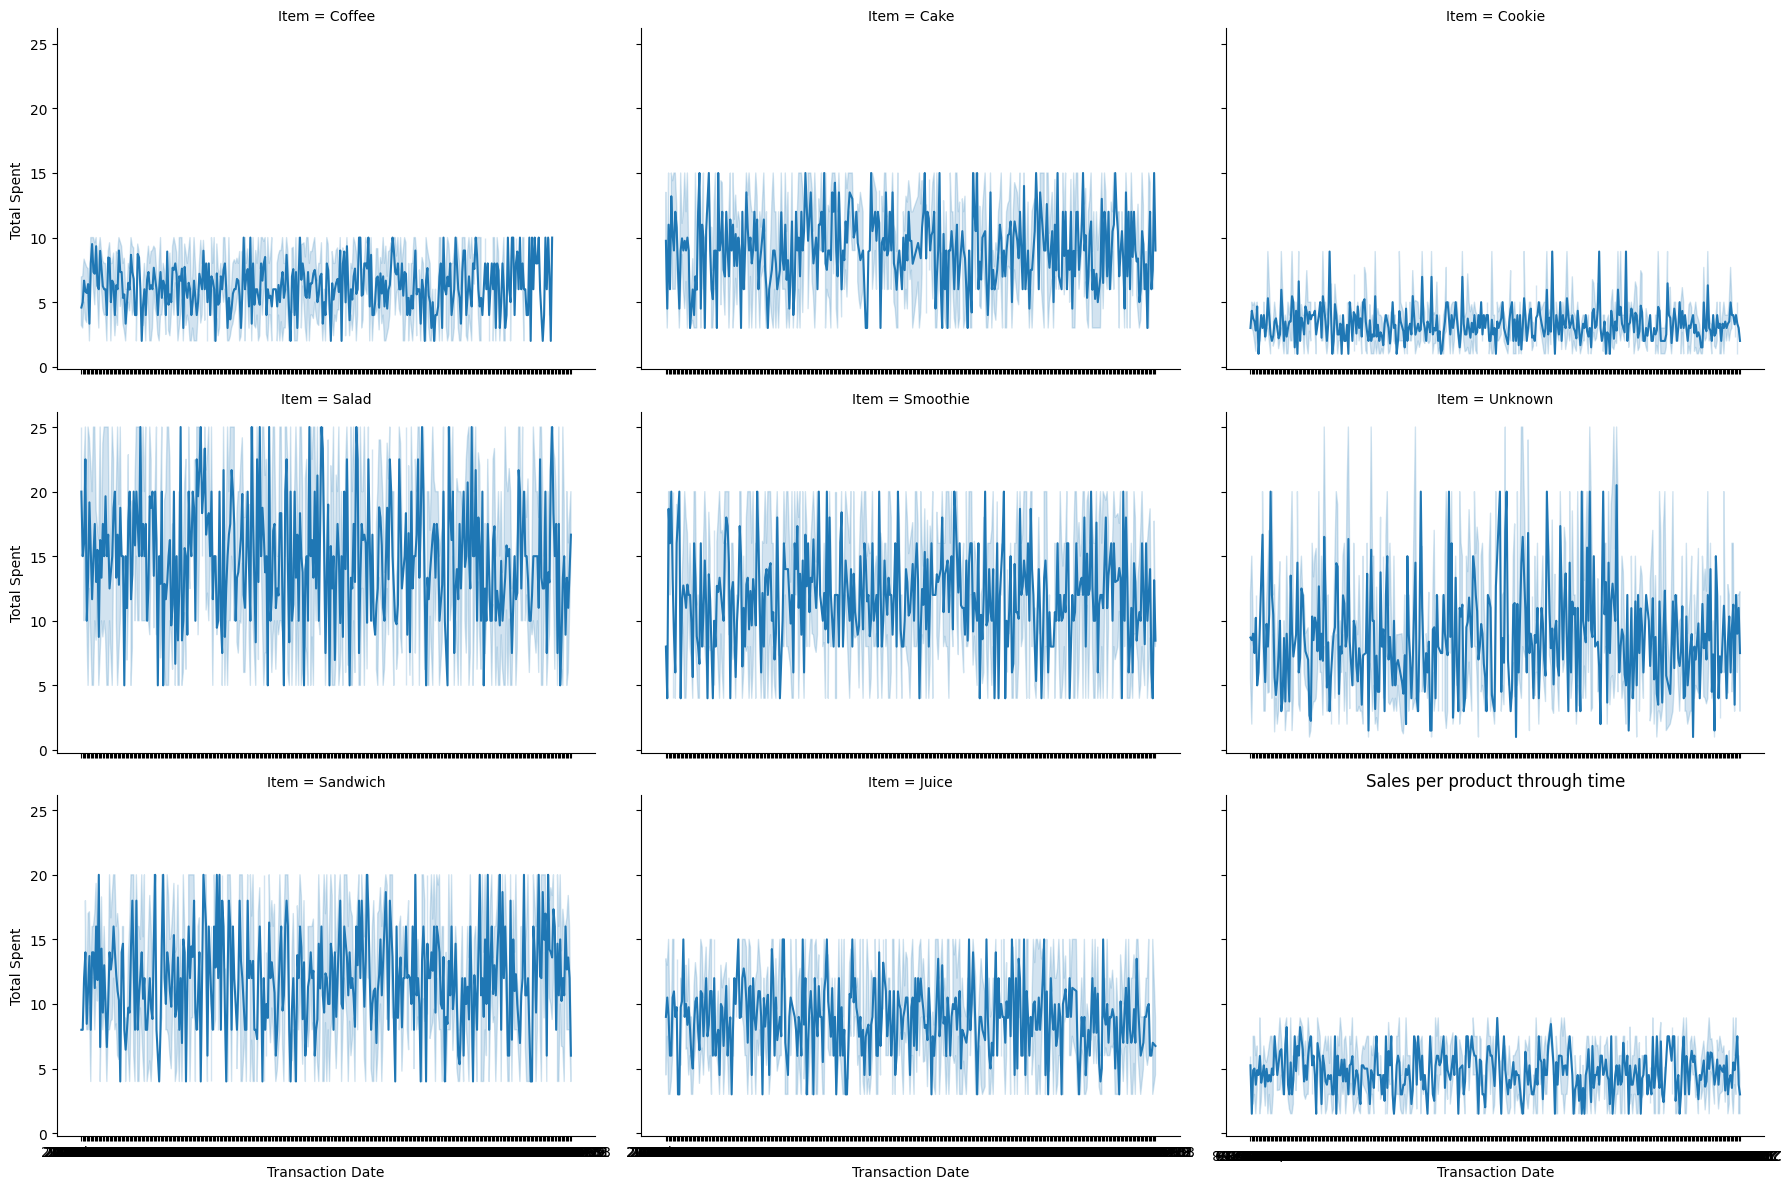

In [66]:
plt.figure(figsize=(22, 8))
g = sns.relplot(
    data=df,
    x="Transaction Date",
    y="Total Spent",
    kind="line",
    col="Item",
    col_wrap=3,
    height=4,
    aspect=1.5
    )
plt.title("Sales per product through time")
plt.xticks(rotation=180)
plt.tight_layout()